In [111]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
% matplotlib inline

## Gathering

In [112]:
#Load csv file
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [113]:
#Request the .tsv file and load it into a separate dataframe
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
file = open('image_predictions.tsv', 'w')
file.write(r.text)
file.close()
df_2 = pd.read_csv('image_predictions.tsv',delimiter='\t')

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '***'
consumer_secret = '***'
access_token = '***'
access_secret = '***'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [114]:
#Load the .json data and extract needed columns
df3 = pd.read_json('tweet_json.txt', lines = True)


In [115]:
#Extract the needed colunm
df_3 = df3[['id','favorite_count','retweet_count']]

## Assessing

In [116]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [117]:
#Dispaly the head of the file
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [118]:
#Dispaly a sample of 50 row
df_1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
65,879492040517615616,NaN,NaN,2017-06-27 00:10:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. He thinks you should measure e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879492040...,12,10,Bailey,None,None,None,None
669,790227638568808452,NaN,NaN,2016-10-23 16:25:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Leela. She's a Fetty Wo...,7.626999e+17,4.196984e+09,2016-08-08 17:19:51 +0000,https://twitter.com/dog_rates/status/762699858...,11,10,Leela,None,None,None,None
748,779377524342161408,NaN,NaN,2016-09-23 17:50:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Have you ever seen such a smol pupper? Portabl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779377524...,12,10,None,None,None,pupper,None
1577,687399393394311168,NaN,NaN,2016-01-13 22:22:41 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Barry. He's very fast. I hope he finds...,NaN,NaN,NaN,https://vine.co/v/iM2hLu9LU5i,10,10,Barry,None,None,None,None
585,800018252395122689,NaN,NaN,2016-11-19 16:49:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo doin a struggle. 11/10 much det...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800018252...,11,10,None,doggo,None,None,None
1754,678798276842360832,NaN,NaN,2015-12-21 04:44:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Linda. She fucking hates trees. 7/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678798276...,7,10,Linda,None,None,None,None
1526,690374419777196032,NaN,NaN,2016-01-22 03:24:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phred. He's an Albanian Flepperkush. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690374419...,11,10,Phred,None,None,None,None
2316,666649482315059201,NaN,NaN,2015-11-17 16:09:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Cool dog. Enjoys couch. Low monotone bark. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666649482...,4,10,None,None,None,None,None
250,845098359547420673,NaN,NaN,2017-03-24 02:22:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bungalo. She uses that ...,7.733088e+17,4.196984e+09,2016-09-06 23:56:05 +0000,https://twitter.com/dog_rates/status/773308824...,12,10,Bungalo,None,None,None,None


In [119]:
#How many duplicates in the file
sum(df_1.duplicated())

0

In [120]:
#To find if there is any wrong rating_denominator and count how many values for each 
df_1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [121]:
#To viwe the rows with wrong denominator
wrong_den = df_1.query('rating_denominator' '!= 10')
wrong_den

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [122]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [123]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [124]:
df_2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
545,677314812125323265,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,2,Blenheim_spaniel,0.924127,True,Japanese_spaniel,0.054790,True,Chihuahua,0.008204,True
959,705591895322394625,https://pbs.twimg.com/media/CcrEFQdUcAA7CJf.jpg,1,basenji,0.877207,True,Italian_greyhound,0.047854,True,miniature_pinscher,0.035638,True
1717,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
530,676819651066732545,https://pbs.twimg.com/media/CWSL4W8WsAAE4KU.jpg,2,rain_barrel,0.625555,False,barrel,0.138383,False,Labrador_retriever,0.039465,True
357,672609152938721280,https://pbs.twimg.com/media/CVWWdKLWEAEnSk7.jpg,1,microwave,0.981946,False,rotisserie,0.007472,False,television,0.005881,False
1857,841680585030541313,https://pbs.twimg.com/media/C65AA7_WoAEGqA9.jpg,1,Chihuahua,0.547401,True,bow_tie,0.198361,False,Pembroke,0.058493,True
57,667073648344346624,https://pbs.twimg.com/media/CUHr8WbWEAEBPgf.jpg,1,Chihuahua,0.483682,True,pug,0.092494,True,Brabancon_griffon,0.057495,True
1651,809448704142938112,https://pbs.twimg.com/media/Czu9RiwVEAA_Okk.jpg,1,Greater_Swiss_Mountain_dog,0.375415,True,Cardigan,0.134317,True,English_springer,0.073697,True
512,676215927814406144,https://pbs.twimg.com/media/CWJmzNsWUAE706Z.jpg,1,hamster,0.999484,False,guinea_pig,0.000158,False,broccoli,0.000061,False


In [125]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [126]:
df_3.head()

,id,favorite_count,retweet_count
0,892420643555336193,34838,7301
1,892177421306343426,30165,5456
2,891815181378084864,22709,3596
3,891689557279858688,38089,7495
4,891327558926688256,36376,8045


## Quality issues :
>1. None instead of NaN
2. Wrong name entry
3. Retweet and replies doesnt have real ratings 
4. Wrong column type for tweet_id
5. Some predicted names starts with small letter and others with capital letter
6. Underscore instead of space
7. Wrong rating denominator
8. Missing data
9. Unused columns  
10. Timestamp column has two different variables



## Tidiness issues :
>1. The columns (doggo, floofer,pupper,puppo) related to the same variable 
2. The two tables (image_predictions.tsv, tweet-json.txt)  related to the same observational units in ‘twitter-archive-enhanced.csv’ table



## Cleaning


In [127]:
#copy files for reference
df_11 = df_1.copy()
df_22 = df_2.copy()
df_33 = df_3.copy()

In [128]:
#Rename 'id' colunm to match the other files
df_33.rename({'id' : 'tweet_id'}, axis=1, inplace=True)

In [129]:
df_33.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


#### Define
- Merging the tables into one

In [130]:
#Merging the files into 1 master file
master_df = df_11.merge(df_22, on = 'tweet_id')
master_df = master_df.merge(df_33, on = 'tweet_id')
#Test
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
jpg_url                       2059 

#### Define
- Remove name with wrong entery
- Replace None with NaN
- Change colunm type for tweet_id

In [131]:
#Remove wrong names
wrong_names = master_df[master_df['name'].str[0].str.islower()]
master_df = master_df.drop(wrong_names.index, axis=0) 

In [132]:
#Change none to NaN in name column
master_df['name'].replace('None', np.NaN, inplace=True)

In [133]:
#Change column type
master_df['tweet_id'] = master_df['tweet_id'].astype('object')

In [134]:
#Drop missing data 
master_df.dropna(subset=['name'], inplace=True)

#### Test

In [135]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 2028
Data columns (total 30 columns):
tweet_id                      1386 non-null object
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1386 non-null object
source                        1386 non-null object
text                          1386 non-null object
retweeted_status_id           43 non-null float64
retweeted_status_user_id      43 non-null float64
retweeted_status_timestamp    43 non-null object
expanded_urls                 1386 non-null object
rating_numerator              1386 non-null int64
rating_denominator            1386 non-null int64
name                          1386 non-null object
doggo                         1386 non-null object
floofer                       1386 non-null object
pupper                        1386 non-null object
puppo                         1386 non-null object
jpg_url                       1386 n

In [136]:
master_df[master_df['name'].str[0].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


#### Define
- Remove replies and retweets by creating dataframe then drop it from master_df
- Drop unused columns

In [137]:
#Remove replies
remove_replies = master_df[master_df['in_reply_to_status_id'].notnull()]
master_df = master_df.drop(remove_replies.index)

In [138]:
#Remove retweets
remove_retweet = master_df[master_df['retweeted_status_id'].notnull()]
master_df = master_df.drop(remove_retweet.index)

#### Test

In [139]:
master_df[master_df['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [140]:
master_df[master_df['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [141]:
#Drop unused columns
master_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id'
        ,'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [142]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 0 to 2028
Data columns (total 24 columns):
tweet_id              1342 non-null object
timestamp             1342 non-null object
text                  1342 non-null object
expanded_urls         1342 non-null object
rating_numerator      1342 non-null int64
rating_denominator    1342 non-null int64
name                  1342 non-null object
doggo                 1342 non-null object
floofer               1342 non-null object
pupper                1342 non-null object
puppo                 1342 non-null object
jpg_url               1342 non-null object
img_num               1342 non-null int64
p1                    1342 non-null object
p1_conf               1342 non-null float64
p1_dog                1342 non-null bool
p2                    1342 non-null object
p2_conf               1342 non-null float64
p2_dog                1342 non-null bool
p3                    1342 non-null object
p3_conf               1342 non-null fl

#### Define
- Replace underscore with space
- Capitalize first letter

In [143]:
#Replacing underscore with space
master_df['p1'].replace('_', ' ', regex=True, inplace=True)
master_df['p2'].replace('_', ' ', regex=True, inplace=True)
master_df['p3'].replace('_', ' ', regex=True, inplace=True)

In [144]:
#Capitalize first letter 
master_df['p1'] = master_df['p1'].str.capitalize()
master_df['p2'] = master_df['p2'].str.capitalize()
master_df['p3'] = master_df['p3'].str.capitalize()

#### Test

In [145]:
master_df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,34838,7301
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,30165,5456
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,22709,3596
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,38089,7495
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,36376,8045


#### Define
- Remove wrong rating_denominator
- Remove wrong rating_numerator

In [146]:
#Remove wrong rating_denominator
wrong_den = master_df.query('rating_denominator' '!= 10')
master_df = master_df.drop(wrong_den.index)

In [147]:
wrong_rating = master_df[master_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
master_df = master_df.drop(wrong_rating.index)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


#### Test 

In [148]:
master_df.query('rating_denominator' '!= 10')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [150]:
master_df[master_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator


#### Define
- Combining the columns doggo, puppo, pupper, floofer into a single column

In [151]:
#New column to combine dog stages into one column
master_df['stage'] = np.NaN
master_df['stage'] = master_df['stage'].astype('object')

In [152]:
#Replacing None with NaN 
cols = ["doggo","floofer","pupper","puppo"]
master_df[cols] = master_df[cols].replace({'None':np.nan})

In [153]:
#Insert dog stage in stage colunm
master_df['stage'] = master_df[master_df.columns[7:11]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)

In [154]:
#Drop unnecessary colunms
master_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [155]:
master_df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,...,False,Bagel,0.085851,False,Banana,0.076110,False,34838,7301,
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,30165,5456,
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,22709,3596,
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper towel,...,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,38089,7495,
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,...,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,36376,8045,


#### Define
- Split timestamp into date and time columns

In [156]:
#Split date and time 
master_df['Dates'] = pd.to_datetime(master_df['timestamp']).dt.date
master_df['Time'] = pd.to_datetime(master_df['timestamp']).dt.time

In [157]:
#Drop timestamp column
master_df.drop(['timestamp'], axis=1, inplace=True)

#### Test

In [158]:
master_df.head()

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,stage,Dates,Time
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,...,0.085851,False,Banana,0.076110,False,34838,7301,,2017-08-01,16:23:56
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,...,0.090647,True,Papillon,0.068957,True,30165,5456,,2017-08-01,00:17:27
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,...,0.078253,True,Kelpie,0.031379,True,22709,3596,,2017-07-31,00:18:03
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper towel,0.170278,...,0.168086,True,Spatula,0.040836,False,38089,7495,,2017-07-30,15:58:51
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,...,0.225770,True,German short-haired pointer,0.175219,True,36376,8045,,2017-07-29,16:00:24


## Analysis

In [162]:
#Basic statistics
master_df.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1336.000000,1336.0,1336.000000,1336.000000,1.336000e+03,1.336000e+03,1336.000000,1336.000000
mean,12.025449,10.0,1.211826,0.599832,1.338706e-01,6.048744e-02,8264.062126,2279.232036
std,48.334192,0.0,0.576086,0.274220,1.005954e-01,5.137811e-02,10723.921680,3426.623889
min,2.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,93.000000,19.000000
25%,10.000000,10.0,1.000000,0.363152,5.234195e-02,1.547278e-02,2049.000000,584.750000
50%,11.000000,10.0,1.000000,0.599265,1.178275e-01,4.929300e-02,4179.000000,1273.000000
75%,12.000000,10.0,1.000000,0.865439,1.971440e-01,9.398600e-02,10740.000000,2752.000000
max,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,115570.000000,53778.000000


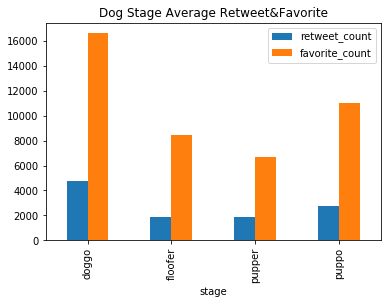

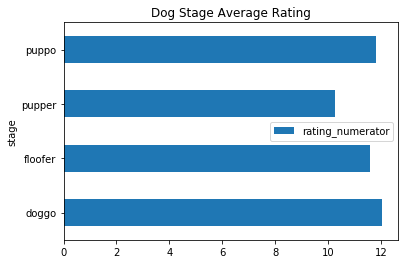

In [163]:
#Creat dataframe to analyse stages data
stages = pd.DataFrame(columns=['stage','rating_numerator','retweet_count','favorite_count'])
stages['stage'] = ['doggo','floofer','pupper','puppo']
for s in stages.stage:
    stage_df = master_df[master_df.stage==s]
    stages.loc[stages.stage == s,'rating_numerator'] = stage_df['rating_numerator'].mean()
    stages.loc[stages.stage == s,'retweet_count'] = stage_df['retweet_count'].mean()
    stages.loc[stages.stage == s,'favorite_count'] = stage_df['favorite_count'].mean()

stages[['stage','retweet_count','favorite_count']].plot(x='stage' , kind='bar',title='Dog Stage Average Retweet&Favorite')
stages[['stage','rating_numerator']].plot(x='stage', kind='barh',title='Dog Stage Average Rating')


In [168]:
stages

,stage,rating_numerator,retweet_count,favorite_count
0,doggo,12.0571,4733.17,16591.3
1,floofer,11.6,1890.4,8451.8
2,pupper,10.2586,1881.98,6670.61
3,puppo,11.8,2758.33,11016.1


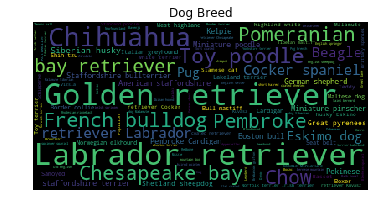

In [164]:
from wordcloud import WordCloud
p = ["p1","p2","p3"]
text = WordCloud().generate(master_df[p].to_string())
plt.imshow(text)
plt.axis("off")
plt.title("Dog Breed")
plt.show()


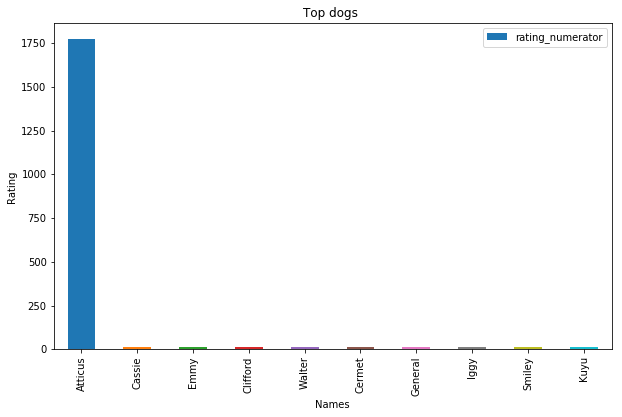

In [165]:
top_dogs = master_df.nlargest(10, 'rating_numerator')
top_dogs.plot.bar(x="name", y="rating_numerator", figsize=(10, 6))
plt.xlabel("Names")
plt.ylabel("Rating")
plt.title("Top dogs ")
plt.show();

## Conclusion
> Doggo stage is the most likable stage from Twitter users.

> The highest rating dog stage is Doggo stage with an average above 12.

> The most three frequent dog breeds are Golden retriever, Labrador retriever and Chihuahua.

> The top 10 dogs are:
- Atticus
- Logan
- Sophie
- Cassie
- Emmy
- Clifford
- Walter
- Cermet
- General 
- Iggy


In [169]:
master_df.to_csv('master_df.csv')

In [171]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0